In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
sample_com= pd.read_parquet('105029-0.parquet', engine='pyarrow')
sample_res= pd.read_parquet('105114-0.parquet', engine='pyarrow')
temp_csv = pd.read_csv('G0100010_2018.csv',parse_dates=["date_time"])

In [3]:
sample_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 105029 to 105029
Data columns (total 51 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   timestamp                                                        35040 non-null  datetime64[ns]
 1   out.district_cooling.cooling.energy_consumption                  0 non-null      float64       
 2   out.district_heating.heating.energy_consumption                  0 non-null      float64       
 3   out.district_heating.water_systems.energy_consumption            0 non-null      float64       
 4   out.electricity.cooling.energy_consumption                       0 non-null      float64       
 5   out.electricity.exterior_lighting.energy_consumption             35040 non-null  float64       
 6   out.electricity.fans.energy_consumption                          0 non-n

In [5]:
sample_res.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 105114 to 105114
Data columns (total 109 columns):
 #    Column                                                           Dtype         
---   ------                                                           -----         
 0    timestamp                                                        datetime64[ns]
 1    out.electricity.bath_fan.energy_consumption                      float64       
 2    out.electricity.ceiling_fan.energy_consumption                   float64       
 3    out.electricity.clothes_dryer.energy_consumption                 float64       
 4    out.electricity.clothes_washer.energy_consumption                float64       
 5    out.electricity.cooking_range.energy_consumption                 float64       
 6    out.electricity.cooling.energy_consumption                       float64       
 7    out.electricity.dishwasher.energy_consumption                    float64       
 8    out.electricity.ex

<AxesSubplot:xlabel='timestamp'>

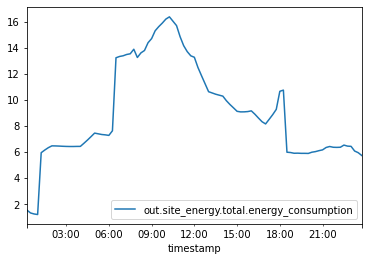

In [8]:
# one day of energy changes for commercial building
col = [item for item in sample_com.columns if 'energy_consumption_' not in item]
timerange= sample_com.timestamp.dt.date == date.fromisoformat('2018-01-01')
sample_com[timerange][['timestamp','out.site_energy.total.energy_consumption']].plot(kind='line', x='timestamp', y='out.site_energy.total.energy_consumption')


<AxesSubplot:xlabel='timestamp'>

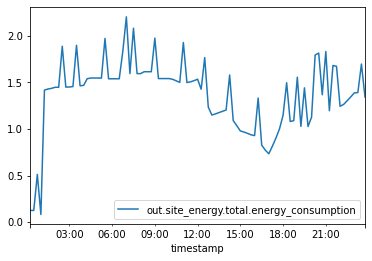

In [13]:
# one day of energy change for residential building
col2 = [item for item in sample_res.columns if 'energy_consumption_' not in item]
timerange1= sample_res.timestamp.dt.date == date.fromisoformat('2018-01-01')
sample_res[timerange1][['timestamp','out.site_energy.total.energy_consumption']].plot(kind='line', x='timestamp', y='out.site_energy.total.energy_consumption')

<AxesSubplot:xlabel='timestamp'>

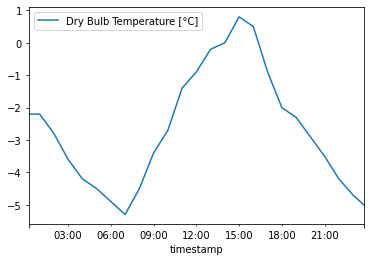

In [10]:
# one day of temperature change
dfcombine= sample_com.merge(temp_csv, how='left', left_on='timestamp', right_on='date_time')
dfcombine.interpolate(limit_direction='both', inplace=True)
timerange= dfcombine.timestamp.dt.date == date.fromisoformat('2018-01-01')
dfcombine[timerange][['timestamp','Dry Bulb Temperature [°C]']].plot(kind='line', x='timestamp')

<AxesSubplot:xlabel='timestamp'>

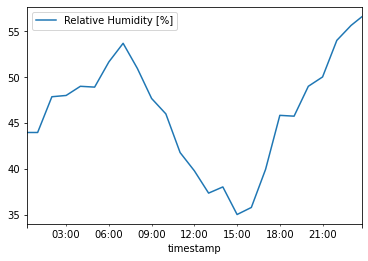

In [11]:
# one day of humidity change
dfcombine[timerange][['timestamp','Relative Humidity [%]']].plot(kind='line', x='timestamp')

<AxesSubplot:xlabel='timestamp'>

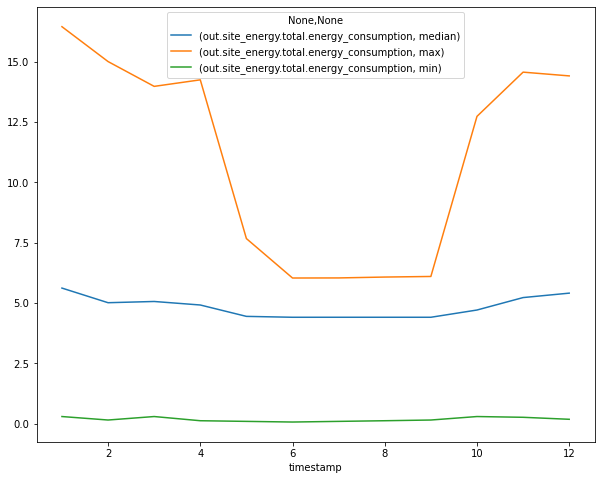

In [18]:
# plot median value per month for a whole year on commercial building
dfsample_agg = sample_com[['timestamp','out.site_energy.total.energy_consumption']].groupby(sample_com['timestamp'].dt.month)\
    .agg({'out.site_energy.total.energy_consumption':['median','max','min']})
dfsample_agg.plot(kind='line', figsize=(10,8))

<AxesSubplot:xlabel='timestamp'>

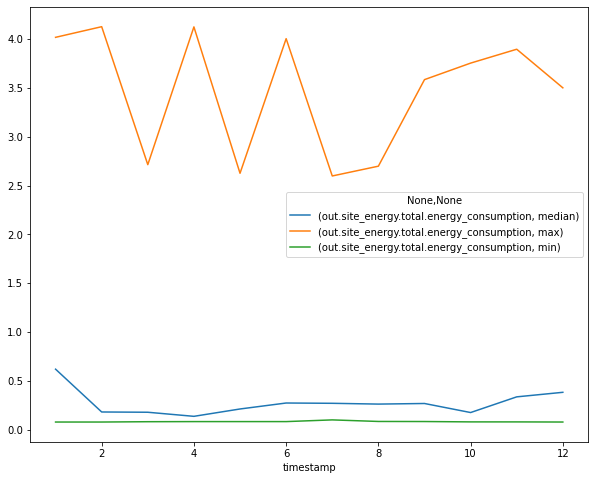

In [22]:
# plot median value per month for a whole year on residential building
dfsample_agg_1 = sample_res[['timestamp','out.site_energy.total.energy_consumption']].groupby(sample_res['timestamp'].dt.month)\
    .agg({'out.site_energy.total.energy_consumption':['median','max','min']})
dfsample_agg_1.plot(kind='line', figsize=(10,8))

<IPython.core.display.Javascript object>


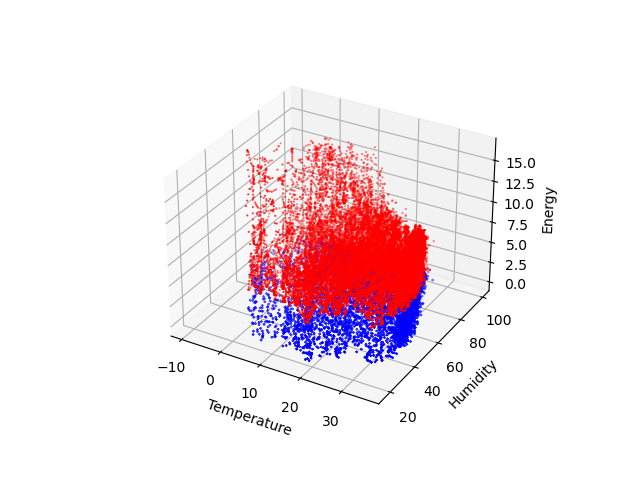

In [26]:
%matplotlib notebook
dfcombine1= sample_res.merge(temp_csv, how='left', left_on='timestamp', right_on='date_time')
dftest= dfcombine.sort_values(by='Dry Bulb Temperature [°C]')
dftest1= dfcombine1.sort_values(by='Dry Bulb Temperature [°C]')

    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dftest['Dry Bulb Temperature [°C]'],dftest['Relative Humidity [%]'], dftest['out.site_energy.total.energy_consumption'],marker='.', c='r',s=1)
ax.scatter(dftest1['Dry Bulb Temperature [°C]'], dftest1['Relative Humidity [%]'],dftest1['out.site_energy.total.energy_consumption'],marker='x', c='b',s=1)

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Energy')
plt.show()

In [3]:
sample_meta_com= pd.read_parquet('metadata_com.parquet', engine='pyarrow')
sample_meta_res= pd.read_parquet('metadata_res.parquet', engine='pyarrow')
types=[]
sample_meta_com['in.building_type'].unique()


array(['SmallOffice', 'RetailStripmall', 'RetailStandalone', 'Warehouse',
       'QuickServiceRestaurant', 'Outpatient', 'MediumOffice',
       'FullServiceRestaurant', 'SecondarySchool', 'LargeHotel',
       'PrimarySchool', 'Hospital', 'SmallHotel', 'LargeOffice'],
      dtype=object)

In [5]:
sample_meta_res['in.geometry_building_type_recs'].unique()

array(['Multi-Family with 5+ Units', 'Multi-Family with 2 - 4 Units',
       'Single-Family Attached', 'Single-Family Detached', 'Mobile Home'],
      dtype=object)